# Research the factors of market value of real estate of SPb

This is the data from a real estate agency - an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. I will try to determine the market value of real estate properties based on this data.

### Step 1. General information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('float_format', '{:.2f}'.format)

cd = os.getcwd()
data = pd.read_csv(cd + '/datasets/real_estate_data_eng.csv', sep='\t')

data.info()
print()

#check NA's
print(data.isna().sum().sort_values(ascending=False))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,nan,Saint Peterburg,24665.00,4232.00,1.00,796.00,3.00,381.00,nan
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,...,8.50,nan,Tosno,nan,nan,nan,nan,nan,nan,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,...,nan,nan,Rozhdestveno village,nan,nan,nan,nan,nan,nan,nan
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,...,23.30,2.00,Saint Peterburg,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,...,9.00,nan,Novyy Uchkvoz village,nan,nan,nan,nan,nan,nan,nan


In [3]:
#let's check the variables one by one
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5D3DBFAC8>]],
      dtype=object)

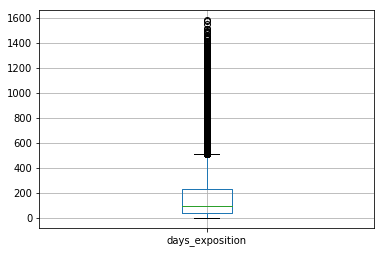

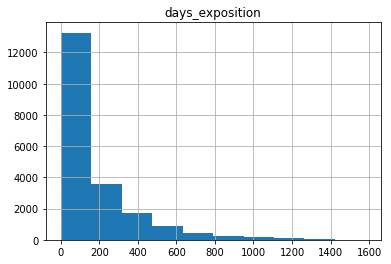

In [4]:
# check outliers for quantitative int variable
data.boxplot(column='days_exposition')
data.hist(column='days_exposition')

quantitative int variables

'total_images', 'rooms', 'floor' - good
'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000' - (float64 -> int64)
'days_exposition' - (float64 -> int64) and outliers

AxesSubplot(0.125,0.125;0.775x0.755)


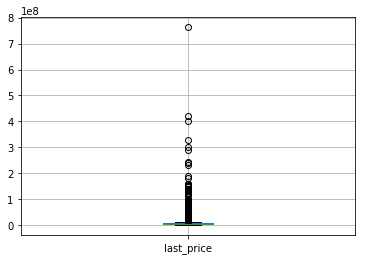

AxesSubplot(0.125,0.125;0.775x0.755)


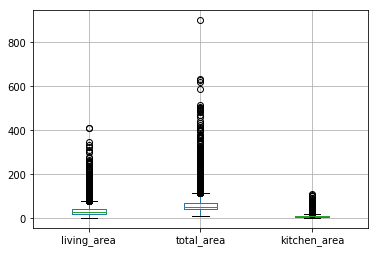

AxesSubplot(0.125,0.125;0.775x0.755)


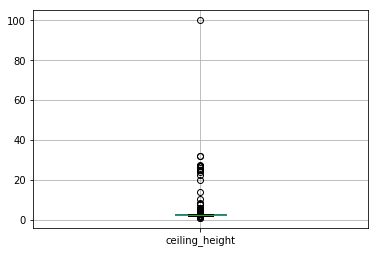

AxesSubplot(0.125,0.125;0.775x0.755)


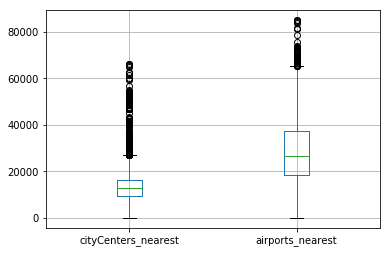

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5D5744208>


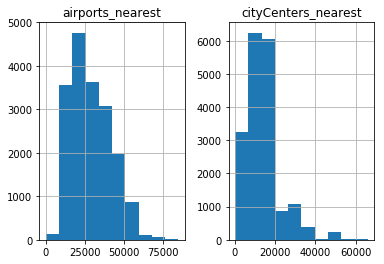

AxesSubplot(0.125,0.125;0.775x0.755)


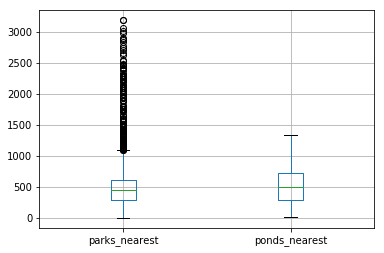

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5D469E4A8>


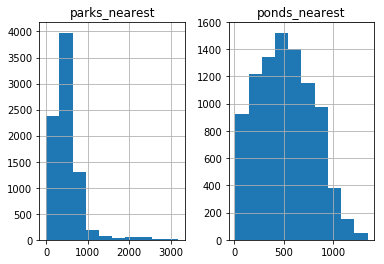

In [5]:
#check outliers for quantitative float variables

# 'last_price' - outliers
print(data.boxplot(column='last_price'))
plt.show()

# 'living_area' - outliers but posible
# 'total_area' - outliers but posible
# 'kitchen_area' - outliers but posible
print(data.boxplot(column=['living_area', 'total_area', 'kitchen_area']))
plt.show()

# 'ceiling_height' - outliers! 100 m ceiling
print(data.boxplot(column='ceiling_height'))
plt.show()

# 'cityCenters_nearest' and 'airports_nearest' outliers but posible
print(data.boxplot(column = ['cityCenters_nearest', 'airports_nearest']))
plt.show()
print(data.hist(column = ['cityCenters_nearest', 'airports_nearest']))
plt.show()

# 'parks_nearest' and 'ponds_nearest' - good
print(data.boxplot(column = ['parks_nearest', 'ponds_nearest']))
plt.show()
print(data.hist(column = ['parks_nearest', 'ponds_nearest']))
plt.show()

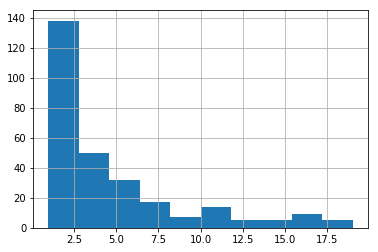

Roshichino village           19
Podporozhye                  19
Pavlovo village              18
Pikalyovo                    18
village Sosnovo              18
Novyi Svit village           17
village Begunitsy            17
Morozova village             17
Bolshaya Izhora village      17
Naziya village               17
Garbolovo village            17
Bol'shiye Kolpany village    16
Boksitogorsk                 16
Annino village               16
Rakhya village               15
Lebyazhye village            15
Dubrovka village             15
Gorbunki village             15
Novaya Ladoga                14
Elizavetino village          13
Kuznechnoye village          13
Ul'yanovka village           13
Kamennogorsk                 13
Vyritsa village              12
village Belogorka            11
Svetogorsk                   11
Koltushi village             11
Mistolovo village            11
Nurma village                11
Maloe Verevo village         11
                             ..
Schast’e

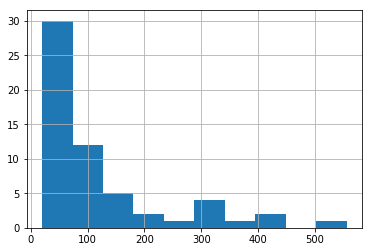

Murino village               556
Shushary village             440
Vsevolozhsk                  398
Pushkin                      369
Kolpino                      338
Pargolovo village            327
Gatchina                     307
Kudrovo village              299
Vyborg                       237
Petergof                     201
Sestroretsk                  183
Krasnoye Selo                178
Kudrovo                      173
Novoye Devyatkino village    144
Sertolovo                    142
Lomonosov                    133
Kirishi                      125
Bugry village                114
Slantsy                      112
Volkhov                      111
Kingisepp                    104
Tosno                        104
Kronshtadt                    96
Nikolskoye                    93
Kommunar                      89
Sosnovy Bor                   87
Kirovsk                       84
Otradnoye                     80
Yanino village                68
Priozersk                     66
Metallostr

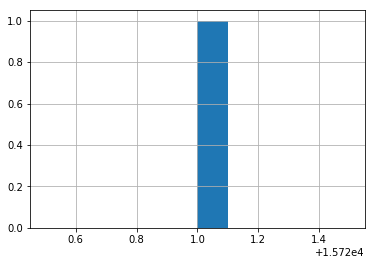

Saint Peterburg    15721
Name: locality_name, dtype: int64
Saint Peterburg   0.66
Name: locality_name, dtype: float64


In [6]:
# object - 'locality_name' - need to be divided into groups
data['locality_name'].value_counts()[data['locality_name'].value_counts() < 20].hist(bins=10)
plt.show()
print(data['locality_name'].value_counts()[data['locality_name'].value_counts() < 20])
print()

data['locality_name'].value_counts()[20 <= data['locality_name'].value_counts()][data['locality_name'].value_counts() < 12000].hist(bins=10)
plt.show()
print(data['locality_name'].value_counts()[20 <= data['locality_name'].value_counts()][data['locality_name'].value_counts() < 12000])
print()

data['locality_name'].value_counts()[12000 <= data['locality_name'].value_counts()].hist(bins=10)
plt.show()
print(data['locality_name'].value_counts()[12000 <= data['locality_name'].value_counts()])
print(data['locality_name'].value_counts()[12000 <= data['locality_name'].value_counts()]/len(data))

In [7]:
# bool - ok
print(data['is_apartment'].value_counts())
print(data['studio'].value_counts())
print(data['open_plan'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64
False    23550
True       149
Name: studio, dtype: int64
False    23632
True        67
Name: open_plan, dtype: int64


### Conclusion

It seen that we have data about 23699 entries (ads). Data containces int, float, bool and object types of the 22 variables. 
Many missing values were found in 14 variables. 

**int var**
* As seen, the data type of some quantitative float variables needs to be changed: *'floors_total'*, *'balcony'*, *'parks_around3000'*, *'ponds_around3000'*, *'days_exposition'* - (float64 -> int64). Also boxplot of 'days_exposition' var shows a lot of outliers. Remaining variables *'total_images'*, *'rooms'*, *'floor'* look's good.

**outliers in float var**
* Close attention to the quantitative float variables shows a lot of outliers in the any of them, except of the *'ponds_nearest'* var.

**'locality_name'**
* Further analisys showed that object *'locality_name'* - need to be divided into groups, becouse it collect at list two groups - locality as Saint-Petersburg, and other. It have sense to devide them. It is also necessary to separate cities from villages. Maybe separate settelments with smole amount of ads.

**bool**
* Bool variable shows very small amount of *'studio'* - studio (149), *'is_apartment'* - apart hotel (50) and *'open_plan'* - open plan (67) type of flets in a sample. 

**date**
* Finaly variable date in *'first_day_exposition'* need to format. 

### Step 2. Data preprocessing

In [8]:
#can fill by zero - mean absence
data['is_apartment'] = data['is_apartment'].fillna(value=0)
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

#can fill by -1 - for transormation the type. Not zero becouse 
data['days_exposition'] = data['days_exposition'].fillna(value=-1)
data['floors_total'] = data['floors_total'].fillna(value=-1)

#the ceiling height doesn't have a big range so let`s replace NA by mean
data['ceiling_height'] = data['ceiling_height'].fillna(value=round(data['ceiling_height'].mean(), 1))

#to replace NA for kitchen area it`is necessary to find ratio of the kitchen to the total area,
#and then a product of this ratio to the total area for the unknown kitchen area values
#this decision based on high correletion between areas of the flat

# data_cor = data[['total_area', 'living_area', 'kitchen_area']]
# print(data_cor.corr())
# data.plot(x='living_area', y='total_area', kind='scatter')
# data.plot(x='kitchen_area', y='total_area', kind='scatter')

ratio_kitchen = data['kitchen_area'].median()/data['total_area'].median()
replace_kitchen_na = ratio_kitchen * data['total_area'][data['kitchen_area'].isna()]
data['kitchen_area'] = data['kitchen_area'].fillna(value=replace_kitchen_na)

#the logic of replacing living are is the same as for the kitchen area
ratio_living = data['living_area'].median()/data['total_area'].median()
replace_living_na = ratio_living * data['total_area'][data['living_area'].isna()]
data['living_area'] = data['living_area'].fillna(value=replace_living_na)

#NA for locality is unknown
data['locality_name'] = data['locality_name'].fillna(value='unkn')

# Other variables with NA's
print(data.isna().sum().sort_values(ascending=False))

airports_nearest        5542
cityCenters_nearest     5519
days_exposition            0
is_apartment               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
studio                     0
ponds_nearest              0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
total_images               0
dtype: int64


In [9]:
#convert to int
data['days_exposition'] = data['days_exposition'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int32
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int32
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           23699 non-null float64
ponds_around3000   

In [10]:
#transform date to datetime64 type.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

### Conclusion

I change the data type of some float variables to int: 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition'. All of this represent indivisible objects. 

A lot of variables have NA's - 14. But not all NA's can be replaced by zero. Based on the logic, the following variables can be replaced. 'is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony', 'parks_around3000', 'ponds_around3000'. - Zero here means an absence.

For convertetion 'days_exposition', 'floors_total' vars to the int type i have to replace them to '-1'. Not zero becouse zero would have additional meaning, and could have an influence to the conclutions. 

NA for 'ceiling height' was filled by mean because it doesn't have a big range. 
NA for 'locality name' is unknown.

'kitchen area' and 'living area' could be replaced by the product of the ratio of the kitchen to the total area to the total area for the unknown kitchen area values. It is possible because correlation between this values high enough for the to the rough prediction of the unknown areas.

### Step 3. Some calculations

In [11]:
# add the price per square meter
data['price_per_m'] = data['last_price'] / data['total_area']

# add the day of the week, month, and year
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# add floor type: first, last and other
def floortype(data):
    if data['floor'] == 1:
        return 'first'
    if data['floor'] == data['floors_total']:
        return 'last'
    else:
        return 'other'
    
data['floor_place'] = data.apply(floortype, axis=1)
data['floor_place'].value_counts()

# add the ratio between the living space and the total area, 
data['living_ratio'] = data['living_area'] / data['total_area']
# and between the kitchen space and the total area.
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

data.describe()
#data.info()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,living_ratio,kitchen_ratio
count,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,...,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00,23699.00
mean,9.86,6541548.77,60.35,2.07,2.78,10.63,34.62,5.89,10.51,0.59,...,167.32,0.59,199.11,156.47,99421.66,2.57,6.40,2017.37,0.57,0.19
std,5.68,10887013.27,35.65,1.08,0.99,6.62,22.38,4.89,6.04,0.96,...,306.71,0.88,305.19,213.65,50306.80,1.79,3.49,1.04,0.10,0.07
min,0.00,12190.00,12.00,0.00,1.00,-1.00,2.00,1.00,1.30,0.00,...,0.00,0.00,0.00,-1.00,111.83,0.00,1.00,2014.00,0.02,0.03
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,...,0.00,0.00,0.00,22.00,76585.47,1.00,3.00,2017.00,0.50,0.14
50%,9.00,4650000.00,52.00,2.00,2.80,9.00,30.00,4.00,9.00,0.00,...,0.00,0.00,0.00,74.00,95000.00,3.00,6.00,2017.00,0.58,0.17
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.17,8.00,12.00,1.00,...,301.00,1.00,389.00,199.00,114256.33,4.00,10.00,2018.00,0.63,0.22
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,...,3190.00,3.00,1344.00,1580.00,1907500.00,6.00,12.00,2019.00,1.00,0.79


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int32
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int32
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int32
parks_nearest           23699 non-null float64
ponds_aroun

### Step 4. Exploratory data analysis

### Ploting a histograms for parameter: area, price, rooms and ceiling height

AxesSubplot(0.125,0.125;0.775x0.755)


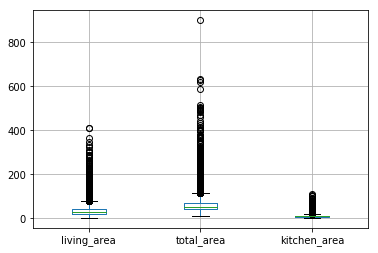

AxesSubplot(0.125,0.125;0.775x0.755)


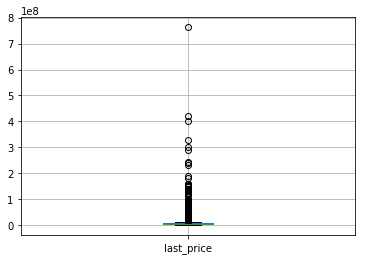

AxesSubplot(0.125,0.125;0.775x0.755)


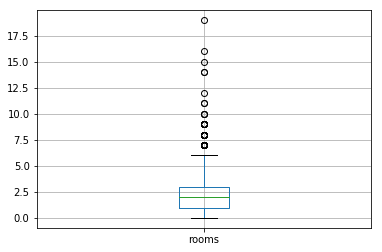

AxesSubplot(0.125,0.125;0.775x0.755)


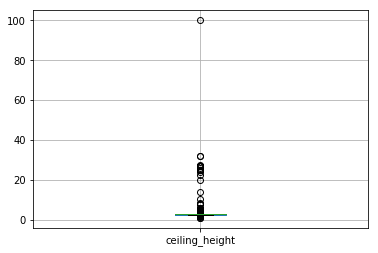

In [13]:
# 'living_area' - outliers but posible
# 'total_area' - outliers but posible
# 'kitchen_area' - outliers but posible
print(data.boxplot(column=['living_area', 'total_area', 'kitchen_area']))
plt.show()

# 'last_price' - outliers
print(data.boxplot(column='last_price'))
plt.show()

# 'rooms' - outliers
print(data.boxplot(column='rooms'))
plt.show()

# 'ceiling_height' - outliers! 100 m ceiling
print(data.boxplot(column='ceiling_height'))
plt.show()

### Examine the time it's taken to sell the apartment

count   23699.00
mean      156.47
std       213.65
min        -1.00
25%        22.00
50%        74.00
75%       199.00
max      1580.00
Name: days_exposition, dtype: float64


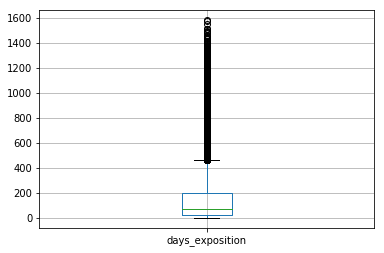

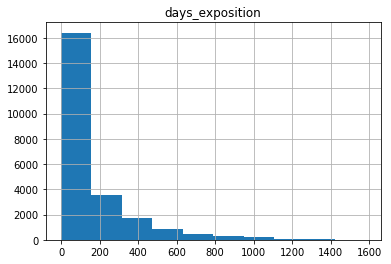

In [14]:
data.boxplot(column='days_exposition')
data.hist(column='days_exposition')
print(data['days_exposition'].describe())

Most of the sales coumlete in a range from 0 to 200 days. Median 74 days and mean 156 days. Mean twice as much becouse of a lot of outliers, as can be seen on boxplot. Quick sale could range from 1 to 35 days approximately. If sale continued more then 150 days can be counsidered long.

### Remove rare and outlying values

ratio of the flat total area less then 150 sq.m. to all flats ares 0.9837545888012152
ratio of the flat living area less then 100 sq.m. to all flats ares 0.9828684754630997
ratio of the flat kitchen area less then 50 sq.m. to all flats ares 0.9819823621249841
AxesSubplot(0.125,0.125;0.775x0.755)


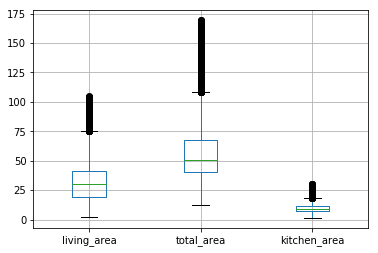

In [15]:
#data = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')

# 'living_area', 'total_area' and 'kitchen_area' - outliers are present but posible
#print(data['total_area'].describe())
print('ratio of the flat total area less then 150 sq.m. to all flats ares', len(data[data['total_area'] < 170])/(len(data['total_area'].dropna())))
print('ratio of the flat living area less then 100 sq.m. to all flats ares', len(data[data['living_area'] < 100])/(len(data['living_area'].dropna())))
print('ratio of the flat kitchen area less then 50 sq.m. to all flats ares', len(data[data['kitchen_area'] < 30])/(len(data['kitchen_area'].dropna())))

data = data[data['total_area'] < 170]
data = data[data['living_area'] < 105]
data = data[data['kitchen_area'] < 30]

print(data.boxplot(column=['living_area', 'total_area', 'kitchen_area']))
plt.show()

ratio of the flat with last price less then 20 mln to all prices 0.9851181410730604
AxesSubplot(0.125,0.125;0.775x0.755)


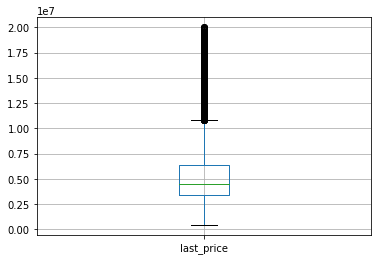

count      22639.00
mean     5286113.27
std      3007136.95
min       430000.00
25%      3390000.00
50%      4500000.00
75%      6370829.00
max     19999000.00
Name: last_price, dtype: float64


In [16]:
# 'last_price' - outliers
print('ratio of the flat with last price less then 20 mln to all prices', len(data[data['last_price'] < 20000000])/(len(data['last_price'])))

data = data[data['last_price'] < 20000000]
print(data.boxplot(column='last_price'))
plt.show()
print(data['last_price'].describe())

ratio of rooms up to 6 to all 0.9987631962542515
AxesSubplot(0.125,0.125;0.775x0.755)


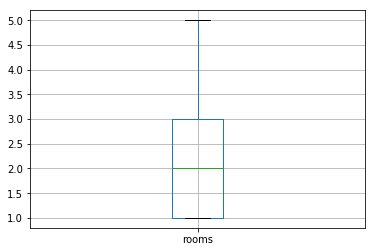

AxesSubplot(0.125,0.125;0.775x0.755)


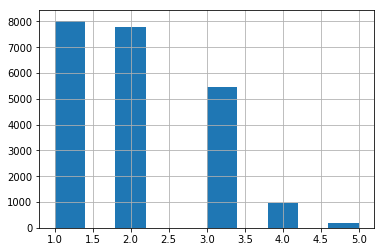

1    8025
2    7793
3    5471
4     944
5     182
Name: rooms, dtype: int64

In [17]:
# 'rooms' - outliers
# the ratio of rooms up to 6 to all others
print('ratio of rooms up to 6 to all', len(data[data['rooms'] < 6])/len(data['rooms']))
data = data[data['rooms'] < 6]
data = data[data['rooms'] > 0]

print(data.boxplot(column='rooms'))
plt.show()
print(data['rooms'].hist(bins=10))
plt.show()
data['rooms'].value_counts()

ratio of ceiling up to 4 and down from 2.5 to all 0.9956725407093464
AxesSubplot(0.125,0.125;0.775x0.755)


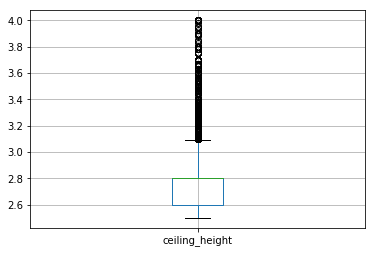

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5D469EC18>]]


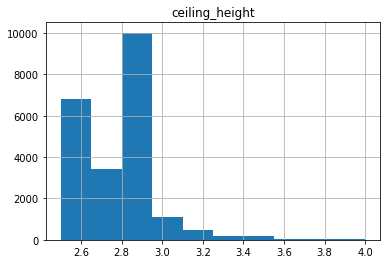

count   22287.00
mean        2.74
std         0.19
min         2.50
25%         2.60
50%         2.80
75%         2.80
max         4.00
Name: ceiling_height, dtype: float64

In [18]:
print('ratio of ceiling up to 4 and down from 2.5 to all', len(data[ (data['ceiling_height'] <= 10) & (data['ceiling_height'] >= 2.5) ])/len(data['ceiling_height'].dropna()))
data = data[ (data['ceiling_height'] <= 4) & (data['ceiling_height'] >= 2.5) ]

print(data.boxplot(column='ceiling_height'))
plt.show()
print(data.hist(column='ceiling_height'))
plt.show()

data['ceiling_height'].describe()

The expected area of the kitchen is less than the living area. The area of the apartment is more than residential and kitchen. 98% of flats have no more 150 total area, 100 living area and 50 kinchen area. 
I removed the highest prices, leaving 98% of the rest. 
99% of the data consist flats from 1 to 6 rooms. Most one-room apartments - 8047, then two-room apartmants - 7940, less tree-room - 5814, 4 - 1180, and least of all 5 - 326. 
Most (99%) of the ceiling flats range from 2.5 to 4 m.

### Factors have had the biggest influence on an apartment’s price
Which factors have had the biggest influence on an apartment’s price? Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the publication date: day of the week, month, and year.

floor_place
first   79757.46
last    86150.47
other   98591.40
Name: price_per_m, dtype: float64


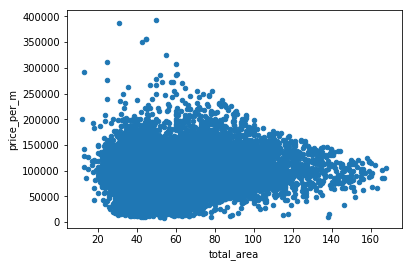

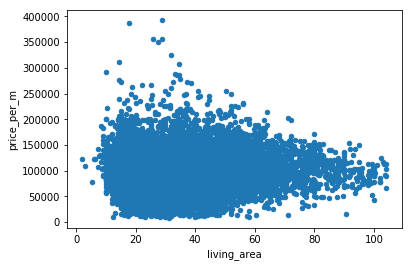

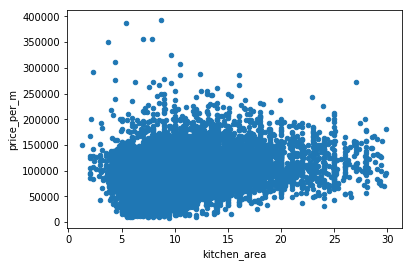

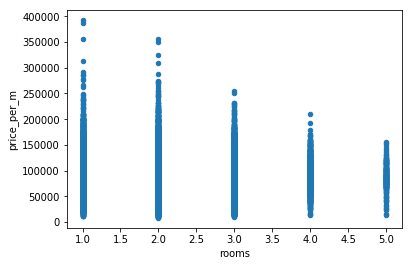

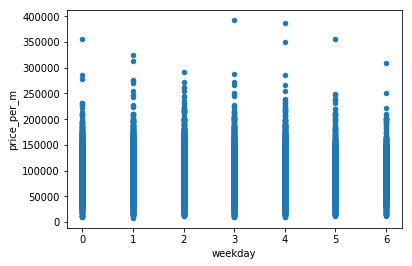

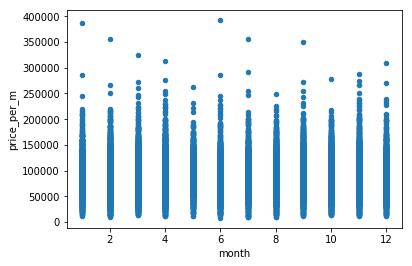

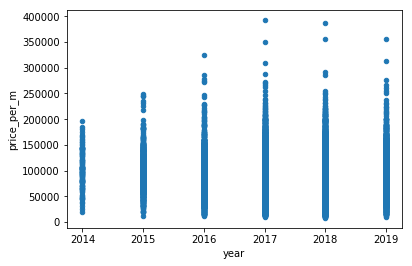

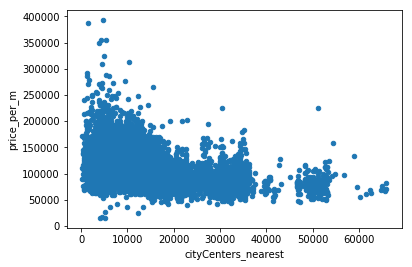

In [19]:
# Let's look to the correlation between price per meter and another values 

data.plot(x='total_area', y='price_per_m', kind='scatter')
data.plot(x='living_area', y='price_per_m', kind='scatter')
data.plot(x='kitchen_area', y='price_per_m', kind='scatter')
data.plot(x='rooms', y='price_per_m', kind='scatter')
data.plot(x='weekday', y='price_per_m', kind='scatter')
data.plot(x='month', y='price_per_m', kind='scatter')
data.plot(x='year', y='price_per_m', kind='scatter')
data.plot(x='cityCenters_nearest', y='price_per_m', kind='scatter')
print(data.groupby('floor_place')['price_per_m'].mean())


#data_cor.info()
#pd.plotting.scatter_matrix(data_cor, figsize=(10,10))

In [20]:
data_cor = data[['price_per_m', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday', 'month', 'year', 'cityCenters_nearest']]
print(data_cor.corr())

                     price_per_m  total_area  living_area  kitchen_area  \
price_per_m                 1.00        0.07        -0.02          0.27   
total_area                  0.07        1.00         0.93          0.55   
living_area                -0.02        0.93         1.00          0.32   
kitchen_area                0.27        0.55         0.32          1.00   
rooms                      -0.13        0.80         0.88          0.18   
weekday                    -0.01       -0.01        -0.01         -0.01   
month                      -0.00        0.02         0.01          0.02   
year                        0.06       -0.08        -0.06         -0.05   
cityCenters_nearest        -0.40       -0.19        -0.18         -0.16   

                     rooms  weekday  month  year  cityCenters_nearest  
price_per_m          -0.13    -0.01  -0.00  0.06                -0.40  
total_area            0.80    -0.01   0.02 -0.08                -0.19  
living_area           0.88    -0.

Grouping flats by levels of the flor we can see, the price for flats on the first floor would be cheapest, on the top floor a little bit expensive. Other flats cost significantly more.
As seen Pearson correlation coefficient doesn't show any significant correlation. 
But scatters show some patterns. 'Area' parameter show less deviation of the price the more area of the flat. 
Also is seen that the price decreasing for apartments with more rooms. 
In scatter with year corr seen seasonal waves. Prices decrease in the beginning and in the middle of the year.
Finally, the closer to the center the more different offers from low to high price. Apartments far from center has mostly low price.

### Housing prices by localities

In [21]:
#built pivot table to find houseing prices for specific locality
locality_index = data["locality_name"].value_counts().nlargest(10).index
(data
 .query('locality_name in @locality_index')
 .pivot_table(index='locality_name', values='price_per_m', aggfunc='mean')
 .sort_values(by='price_per_m', ascending=False)
)

,price_per_m
locality_name,
Saint Peterburg,108389.38
Pushkin,101680.61
Kudrovo village,92369.19
Pargolovo village,90479.24
Murino village,85038.70
Shushary village,78482.36
Kolpino,75352.48
Gatchina,68739.50
Vsevolozhsk,67039.54


As seen the highest price is for the Saint Petersburg, and the lowest for Vsevolozhsk, among most popular for advertising localities 

### Downtown border

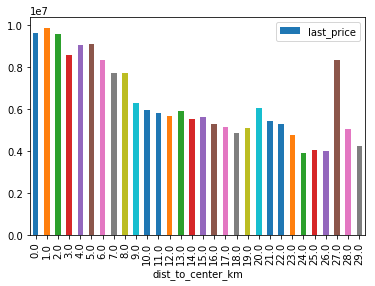

In [22]:
#data = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')
data_spb = data.loc[data['locality_name'] == 'Saint Peterburg']
#data_spb = data.loc['Saint Peterburg', 'locality_name']
data_spb['dist_to_center_km'] = (data_spb['cityCenters_nearest'] / 1000).round()
(data_spb
 .pivot_table(index='dist_to_center_km', values='last_price', aggfunc='mean')
 .plot(kind='bar', y='last_price'))


Downtown border is 3 km from the center

### Downtown border

#### select all the apartments in the downtown

In [23]:
def downtown_fun(dist):
    if dist <= 3:
        return 1
    else: 
        return 0

data_spb['downtown'] = data_spb['dist_to_center_km'].apply(downtown_fun)
data_spb['downtown'].value_counts()

0    13856
1      660
Name: downtown, dtype: int64

### Final correlations between downtown and the city

#### examine correlations between the following parameters: total area, price, number of rooms, ceiling height

                last_price  price_per_m  total_area  rooms  ceiling_height
last_price            1.00         0.41        0.69   0.47            0.20
price_per_m           0.41         1.00       -0.31  -0.32            0.07
total_area            0.69        -0.31        1.00   0.76            0.16
rooms                 0.47        -0.32        0.76   1.00            0.07
ceiling_height        0.20         0.07        0.16   0.07            1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5D581E6D8>,
      dtype=object)

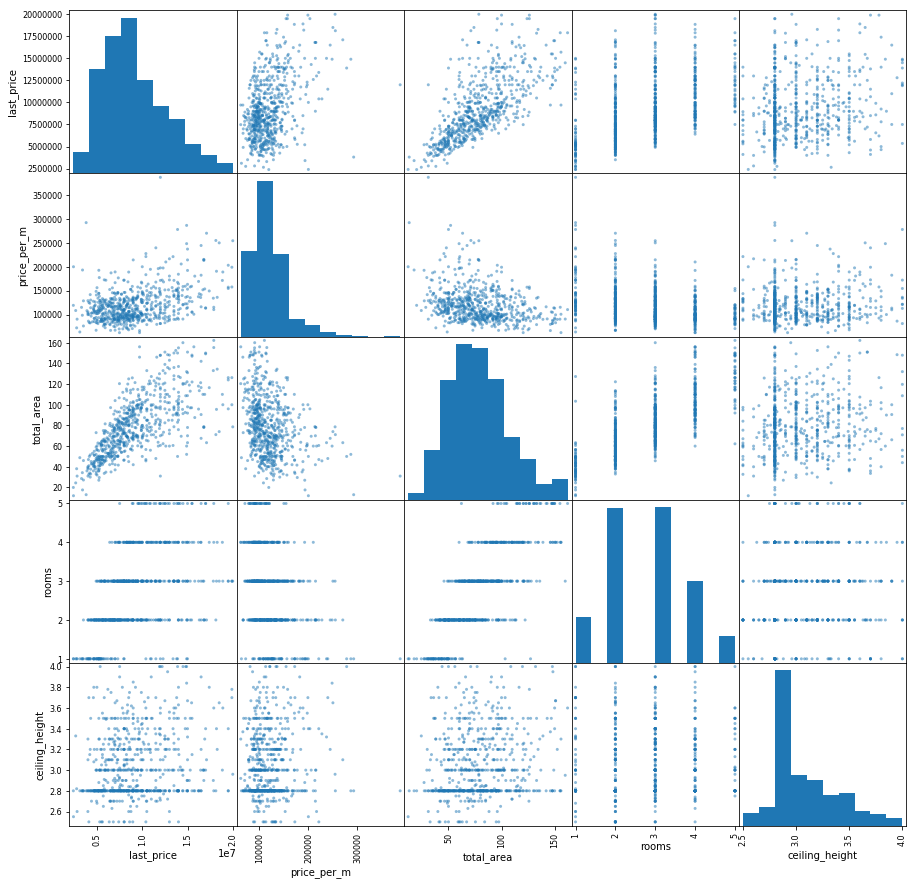

In [24]:
data_cor = data_spb[data_spb['downtown'] == 1][['last_price','price_per_m','total_area','rooms','ceiling_height']]
print(data_cor.corr())
pd.plotting.scatter_matrix(data_cor, figsize=(15, 15))

                last_price  price_per_m  total_area  rooms  ceiling_height
last_price            1.00         0.54        0.82   0.51            0.37
price_per_m           0.54         1.00       -0.00  -0.24            0.21
total_area            0.82        -0.00        1.00   0.79            0.33
rooms                 0.51        -0.24        0.79   1.00            0.13
ceiling_height        0.37         0.21        0.33   0.13            1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5D5807978>,
      dtype=object)

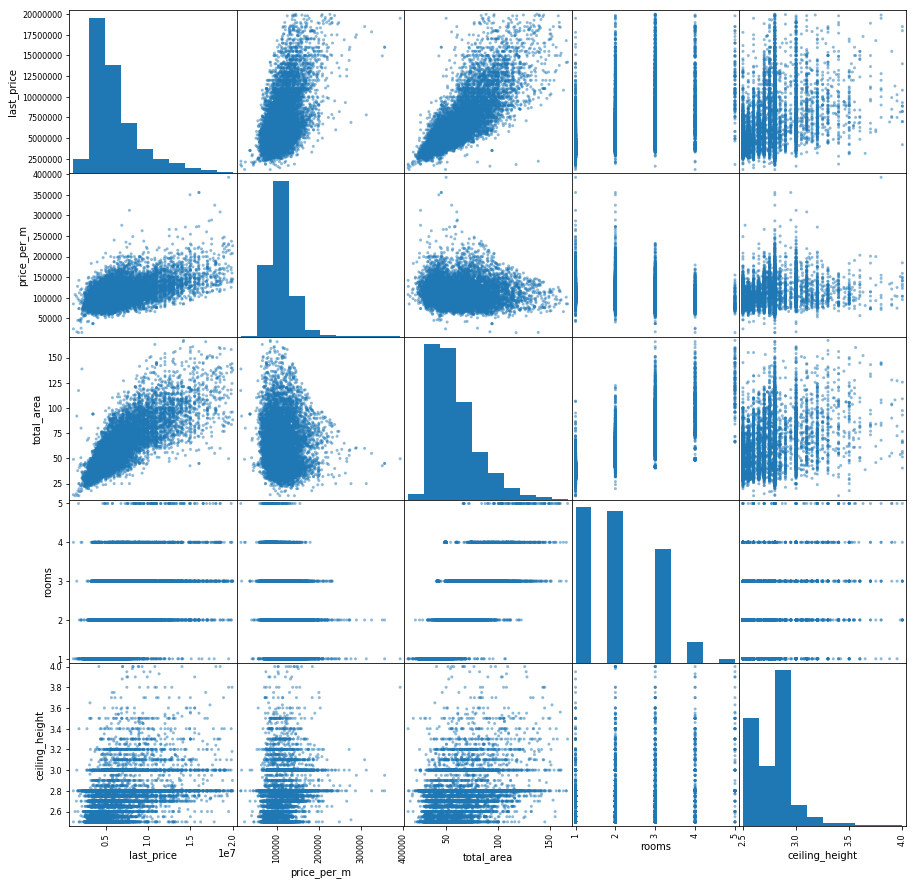

In [25]:
data_cor = data_spb[data_spb['downtown'] == 0][['last_price','price_per_m','total_area','rooms','ceiling_height']]
print(data_cor.corr())
pd.plotting.scatter_matrix(data_cor, figsize=(15, 15))

#### identify the factors that affect an apartment’s price: number of rooms, floor, distance to the downtown area, and ad publication date

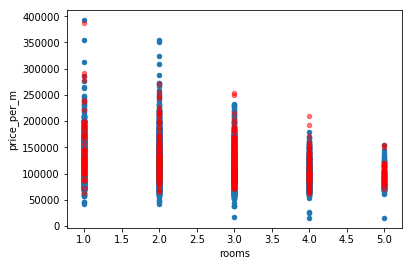

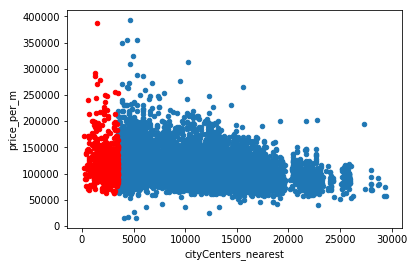

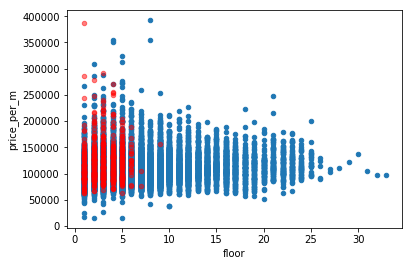

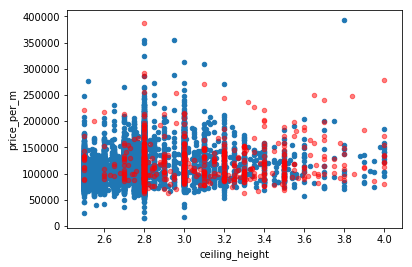

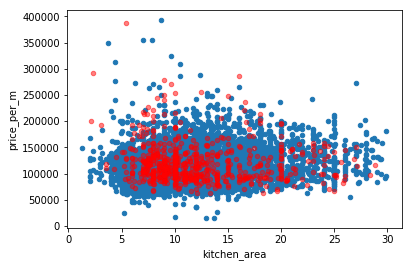

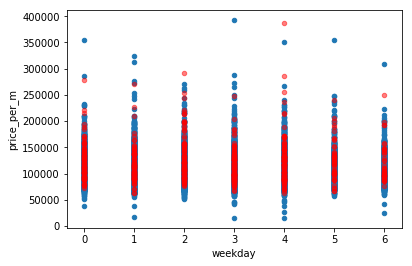

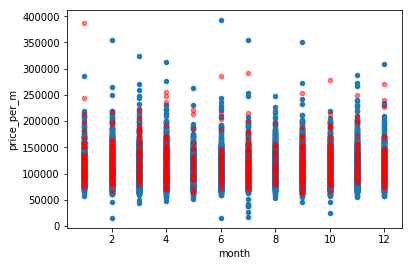

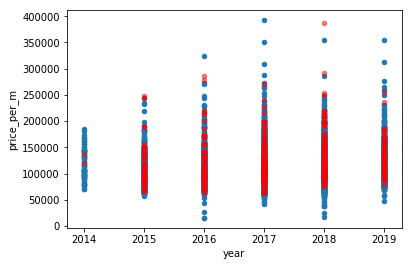

In [26]:
#print('downtown',)

ax = data_spb[data_spb['downtown'] == 0].plot(x='rooms', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='rooms', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)

ax = data_spb[data_spb['downtown'] == 0].plot(x='cityCenters_nearest', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='cityCenters_nearest', y='price_per_m', kind='scatter', ax=ax, color='red')

ax = data_spb[data_spb['downtown'] == 0].plot(x='floor', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='floor', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)

ax = data_spb[data_spb['downtown'] == 0].plot(x='ceiling_height', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='ceiling_height', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)

ax = data_spb[data_spb['downtown'] == 0].plot(x='kitchen_area', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='kitchen_area', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)

ax = data_spb[data_spb['downtown'] == 0].plot(x='weekday', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='weekday', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)

ax = data_spb[data_spb['downtown'] == 0].plot(x='month', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='month', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)

ax = data_spb[data_spb['downtown'] == 0].plot(x='year', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='year', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)


print()

downtown floor_place
first   113684.20
last    118322.59
other   123168.14
Name: price_per_m, dtype: float64
another city floor_place
first    95718.75
last    105172.01
other   109754.05
Name: price_per_m, dtype: float64


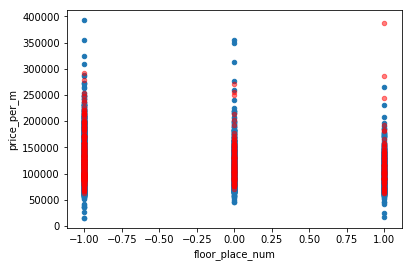

In [27]:
def floorfunc(type):
    if type == 'first':
        return 1
    if type == 'last':
        return 0
    else:
        return -1
    
data_spb['floor_place_num'] = data_spb['floor_place'].apply(floorfunc)

ax = data_spb[data_spb['downtown'] == 0].plot(x='floor_place_num', y='price_per_m', kind='scatter')
data_spb[data_spb['downtown'] == 1].plot(x='floor_place_num', y='price_per_m', kind='scatter', ax=ax, color='red', alpha=0.5)

print('downtown', data_spb[data_spb['downtown'] == 1].groupby('floor_place')['price_per_m'].mean())
print('another city', data_spb[data_spb['downtown'] == 0].groupby('floor_place')['price_per_m'].mean())

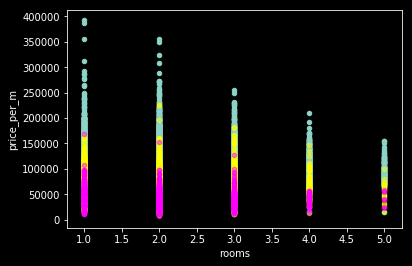

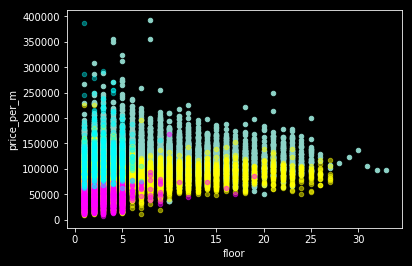

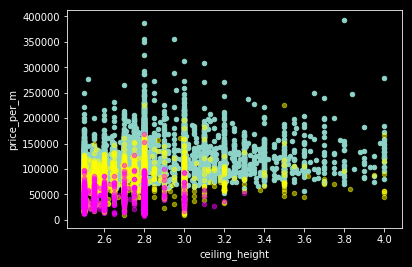

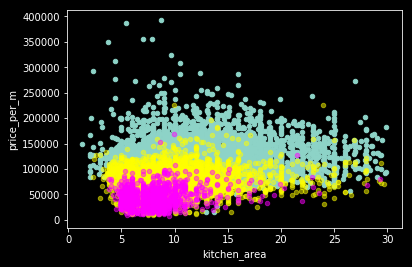

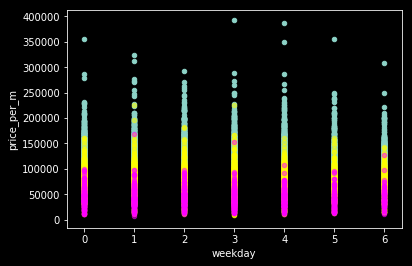

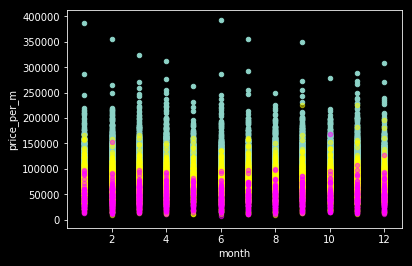

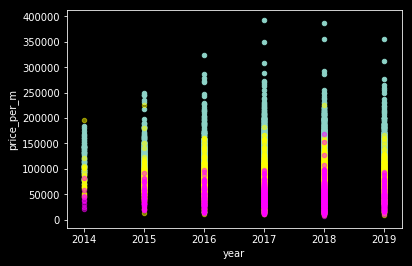

In [28]:
#I suggested that territories with the most offers have more populations. 
#So I divided the territories by size: small, medium and Peter
data_small_offer_list = data['locality_name'].value_counts()[data['locality_name'].value_counts() < 20].index
data_medium_list = data['locality_name'].value_counts()[20 <= data['locality_name'].value_counts()][data['locality_name'].value_counts() < 8000].index

data_small_offer = data.query('locality_name in @data_small_offer_list')
data_medium_offer = data.query('locality_name in @data_medium_list')

plt.style.use("dark_background")
ax = data_spb.plot(x='rooms', y='price_per_m', kind='scatter')
data_medium_offer.plot(x='rooms', y='price_per_m', kind='scatter', ax=ax, color='yellow', alpha=0.5)
data_small_offer.plot(x='rooms', y='price_per_m', kind='scatter', ax=ax, color='magenta', alpha=0.5)

ax = data_spb[data_spb['downtown'] == 0].plot(x='floor', y='price_per_m', kind='scatter')
data_medium_offer.plot(x='floor', y='price_per_m', kind='scatter', ax=ax, color='yellow', alpha=0.5)
data_small_offer.plot(x='floor', y='price_per_m', kind='scatter', ax=ax, color='magenta', alpha=0.5)
data_spb[data_spb['downtown'] == 1].plot(x='floor', y='price_per_m', kind='scatter', ax=ax, color='cyan', alpha=0.4)

ax = data_spb.plot(x='ceiling_height', y='price_per_m', kind='scatter')
data_medium_offer.plot(x='ceiling_height', y='price_per_m', kind='scatter', ax=ax, color='yellow', alpha=0.5)
data_small_offer.plot(x='ceiling_height', y='price_per_m', kind='scatter', ax=ax, color='magenta', alpha=0.5)

ax = data_spb.plot(x='kitchen_area', y='price_per_m', kind='scatter')
data_medium_offer.plot(x='kitchen_area', y='price_per_m', kind='scatter', ax=ax, color='yellow', alpha=0.5)
data_small_offer.plot(x='kitchen_area', y='price_per_m', kind='scatter', ax=ax, color='magenta', alpha=0.5)

ax = data_spb.plot(x='weekday', y='price_per_m', kind='scatter')
data_medium_offer.plot(x='weekday', y='price_per_m', kind='scatter', ax=ax, color='yellow', alpha=0.5)
data_small_offer.plot(x='weekday', y='price_per_m', kind='scatter', ax=ax, color='magenta', alpha=0.5)

ax = data_spb.plot(x='month', y='price_per_m', kind='scatter')
data_medium_offer.plot(x='month', y='price_per_m', kind='scatter', ax=ax, color='yellow', alpha=0.5)
data_small_offer.plot(x='month', y='price_per_m', kind='scatter', ax=ax, color='magenta', alpha=0.5)

ax = data_spb.plot(x='year', y='price_per_m', kind='scatter')
data_medium_offer.plot(x='year', y='price_per_m', kind='scatter', ax=ax, color='yellow', alpha=0.5)
data_small_offer.plot(x='year', y='price_per_m', kind='scatter', ax=ax, color='magenta', alpha=0.5)

dots (white background):
* red - downtown
* blue - another city

Downtown - higher ceiling, less one-room and more four-room apartments. The more rooms, the less price per meter for all flats. Price per meter higher than for the rest of city. In downtown are exclusively no more 7 floor houses. In the center the ceiling higher in an average. The first and last floor in an expensive area is equally cheaper than other floors. Another parameters doesn't look different. 

I suggested that territories with the most offers have more populations. So I divided the territories by size: small, medium and SPb

dots (black background):
* blue - SPb
* yellow - middle 
* magenta - small

Small territories have as small houses as downtown in the SPb, but in price much chipper. The biggest territory has the higher ceiling, and kitchen area. As seen previously seasonal variations can be observed. And finally, from year to year sales are up.

### Step 5. Overall conclusion

This analicys was based on ads data, which as expected represent offer on the apartment markent in Leningradskiy region (Saint-Petersburg). Findings rainforce preliminary intuitions abount this market. '

1. As expected downtown area in Saint Petersburg concentraite the most expencive property; 
2. Correletional analisis (Pierson corr test) doesn't show any significant relations with alleged factors;
3. But scetters show some patterns:
    * The more rooms in the flet the chipest price for the squere meter; 
    * Also was detected that flats on the last and first floors cost cheeper than others and;
    * Seasonal variations can be observed;
    * From year to year sales are up.
    
Also was discovered some features of the property depending on the place
1. Downtown has:
    * higher ceiling; 
    * less one-room and more four-room apartments;
    * no more 7 floor houses
2. Small territories:
    * have as small houses as downtown in the SPb;
    * have smaller ceiling, and kitchen area than bigger area and center of CPb